# ML Technique - SVM

Sources: https://github.com/cmadusankahw/email-spam-detection-with-SVM

https://www.kaggle.com/code/elnahas/phishing-email-detection-using-svm-rfc

### Technique Summary: 
1. We loaded the email dataset.
2. We removed rows with empty body text, and ensured the body text was treated as strings. 
3. We then used TF-IDF to convert the body text into numerical values that represent the importance of words. 
4. The dataset was split into training, testing and validation sets.
5. Finally, we evaluated the model's performance on the test set using accuracy, confusion matrix, and classification report to assess its effectiveness in detecting phishing emails.

In [91]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, balanced_accuracy_score, roc_auc_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

## Load the Dataset

In [92]:
import pandas as pd

# Load the dataset
# data_path = '../masterData.csv'
data_path = '../Code/masterDataset.csv'
master_data = pd.read_csv(data_path)

# Define the data paths
data_path = '../Code/'
train_data_path = data_path + 'trainData.csv'
test_data_path = data_path + 'testData.csv'
validation_data_path = data_path + 'validationData.csv'

# Load the datasets
train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
validation_data = pd.read_csv(validation_data_path)


# Display the first few rows of each dataset to verify
print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())
print("\nValidation Data:")
print(validation_data.head())

Train Data:
                        Subject  \
0  emissionscompression meeting   
1   foolwatch ready buy paychex   
2               sonat park loan   
3                   eddie isted   
4          proposal for_website   

                                                Body  label  
0  would guys available afternoon 3pm meet chris ...      0  
1  foolwatch motley fool thursday october 25 2001...      0  
2  mark hired special bankruptcy attorney works t...      0  
3  notice message sent outside university victori...      1  
4  hi checking website behalf email eatuvicca see...      1  

Test Data:
                                 Subject  \
0                    caiso board meeting   
1                                 summer   
2                       western frontier   
3                                    pge   
4  disconnection notice paservice1uvicca   

                                                Body  label  
0  going speak sue dave listen board governors lo...      0  
1  a

In [93]:
# Count the number of instances of each class in the training data
class_counts = train_data['label'].value_counts()
print("Class Distribution in Training Data:")
print(class_counts)

Class Distribution in Training Data:
0    3590
1    1809
Name: label, dtype: int64


A little analysis on the master data

In [94]:
master_data.count()

Subject    7264
Body       7693
label      7713
dtype: int64

In [95]:
# Check for missing values
missing_values = master_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 Subject    449
Body        20
label        0
dtype: int64


In [96]:
# Handle missing values
# Remove rows with empty 'Body'
master_data = master_data.dropna(subset=['Body'])

# Replace missing values in 'Subject' with a space
master_data['Subject'].fillna(' ', inplace=True)

Here we extract the separated data

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Prepare features and target for training data
X_train = train_data['Body']
y_train = train_data['label']

# Prepare features and target for testing data
X_test = test_data['Body']
y_test = test_data['label']

# Prepare features and target for validation data
X_val = validation_data['Body']
y_val = validation_data['label']

Quick cross validaton preparation

In [98]:
# Check for missing values in train data
missing_values_tr = train_data.isnull().sum()
print("Missing values in each column:\n", missing_values_tr)

Missing values in each column:
 Subject    312
Body        16
label        0
dtype: int64


In [99]:
# Handle missing values by removing rows with empty 'Body'
train_data = train_data.dropna(subset=['Body'])
test_data = test_data.dropna(subset=['Body'])
validation_data = validation_data.dropna(subset=['Body'])

# Replace missing values in 'Subject' with a space
train_data['Subject'].fillna(' ', inplace=True)
test_data['Subject'].fillna(' ', inplace=True)
validation_data['Subject'].fillna(' ', inplace=True)

In [100]:
# Prepare features and target for training data
X_train = train_data['Body'].astype(str)
y_train = train_data['label']

# Prepare features and target for testing data
X_test = test_data['Body'].astype(str)
y_test = test_data['label']

# Prepare features and target for validation data
X_val = validation_data['Body'].astype(str)
y_val = validation_data['label']

# TF-IDF (Term Frequency-Inverse Document Frequency) 
is a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (called the corpus). It's commonly used in text mining and information retrieval.

* Term Frequency (TF): Measures how frequently a term appears in a document. For example, if the word "phishing" appears 3 times in a 100-word email, the TF for "phishing" is 3/100 = 0.03.
* Inverse Document Frequency (IDF): Measures how important a term is across all documents. Rare terms across documents have higher IDF values. For example, if "phishing" appears in 10 out of 1000 emails, the IDF for "phishing" is log(1000/10).

### WHY TF-IDF?
* Captures Importance: TF-IDF helps identify important words in an email by balancing the frequency of words in a single email (TF) with how common those words are across all emails (IDF).
* Numerical Representation: Machine learning models require numerical input. TF-IDF converts text data into numerical vectors that the models can understand and learn from.

In [101]:
# Vectorize the 'Body' text data using TF-IDF
# We use TF-IDF to convert the text data in the Body column into numerical vectors. 
# Each email body is transformed into a list of numbers representing the importance of each word in that email.

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
X_val_vec = vectorizer.transform(X_val)

# Training the SVM model
We train the SVM model using the numerical TF-IDF vectors. The model learns patterns and associations between the text (represented as numbers) and the labels (phishing or not phishing).

In [9]:
# This helps in evaluating the model's performance on unseen data.
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Add Regularization to fix overfitting:

Increase the regularization parameter 𝐶
C in the SVM model to penalize complexity and help prevent overfitting.
svm_classifier = SVC(C=1.0) (default) can be adjusted to a lower value like svm_classifier = SVC(C=0.1).

With a lower 𝐶 value, the SVM model becomes less strict about misclassifications. This leads to a simpler decision boundary that does not fit the training data too closely, thus improving the model's ability to generalize to new, unseen data.

#### Adding class_weight='balanced'

The class_weight='balanced' parameter is added to the SVM classifier to address class imbalance in the training data.

By assigning higher weights to the minority class, the loss function penalizes misclassifications of the minority class more heavily than the majority class.
This encourages the model to make correct predictions for the minority class, thereby improving its recall (True Positive Rate) and reducing bias towards the majority class.

 it improves the model's ability to correctly identify phishing emails 

In [125]:
# Initialize the SVM classifier
svm_classifier = SVC(C=0.5)

In [126]:
# Train the SVM classifier on the training data
svm_classifier.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test_vec)

## Evaluate the Model:

Test the model on the testing set to see how well it can predict whether an email is phishing based on the learned patterns.

In [109]:
# Evaluate the model on the test data
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Test Data Evaluation:")
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Data Evaluation:
Accuracy: 0.9714285714285714
Confusion Matrix:
 [[759   4]
 [ 29 363]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       763
           1       0.99      0.93      0.96       392

    accuracy                           0.97      1155
   macro avg       0.98      0.96      0.97      1155
weighted avg       0.97      0.97      0.97      1155



In [110]:
f1_weight = f1_score(y_test, y_pred)
print(f"F1-Score: {f1_weight:.6f}")



F1-Score: 0.956522


In [111]:
# Extract TP, FP, FN, TN from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate TPR (Sensitivity or Recall) and FPR
tpr_value = tp / (tp + fn)
fpr_value = fp / (fp + tn)

print(f"True Positive Rate (TPR): {tpr_value:.6f}")
print(f"False Positive Rate (FPR): {fpr_value:.6f}")

True Positive Rate (TPR): 0.926020
False Positive Rate (FPR): 0.005242


# Visualizations

## Word Clouds
Display the most common words in phishing and non-phishing emails.
    We use WordCloud

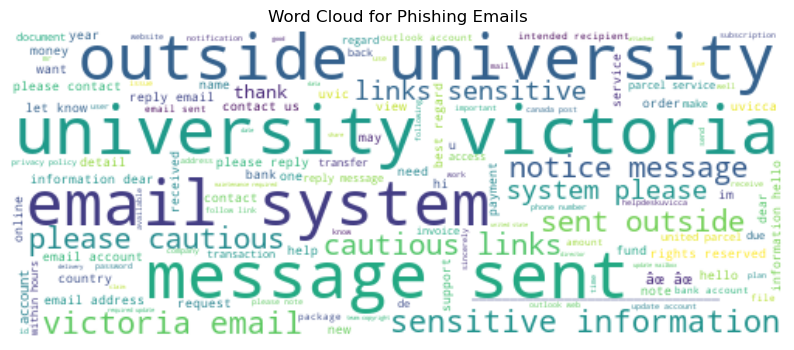

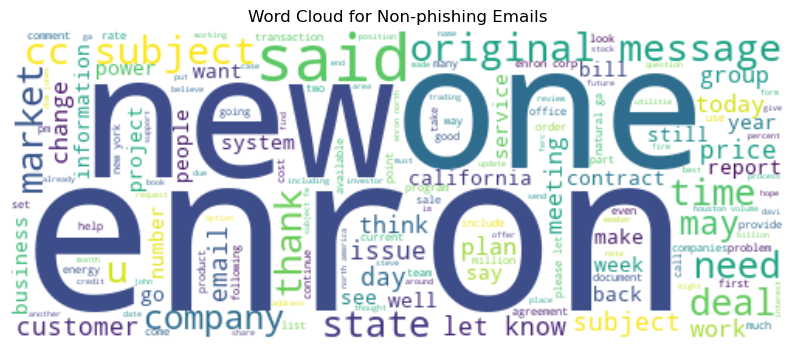

In [42]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for phishing and non-phishing emails
# Combine text data into a single string.
# combining all email bodies for phishing and non-phishing emails separately:
phishing_text = ' '.join(master_data[master_data['label'] == 1]['Body'])
non_phishing_text = ' '.join(master_data[master_data['label'] == 0]['Body'])

# Word cloud for phishing emails
# Create a WordCloud object and generate the word cloud using the generate method:

wordcloud_phishing = WordCloud(width=500, height=200, background_color='white').generate(phishing_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_phishing, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Phishing Emails')
plt.show()

# Word cloud for non-phishing emails
wordcloud_non_phishing = WordCloud(width=500, height=200, background_color='white').generate(non_phishing_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_phishing, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-phishing Emails')
plt.show()


Phishing Emails:

Common words: "message," "link," "sent," "account," "university," "outside," "victoria," "system," "please," "email."
Interpretation: Phishing emails often use terms related to actions like "click" or "link," and institutional names to appear legitimate. Words like "account" and "system" suggest attempts to trick recipients into thinking the email is from a trusted source.

Non-Phishing Emails:

Common words: "enron," "will," "email," "new," "thank," "need," "may," "pm," "one," "cc."
Interpretation: Non-phishing emails often contain more conversational words and typical business communication terms. The frequent occurrence of "enron" suggests that many emails might be related to business discussions or historical data.

## Confusion Matrix
Understand the performance of the model by visualizing true positives, false positives, true negatives, and false negatives.

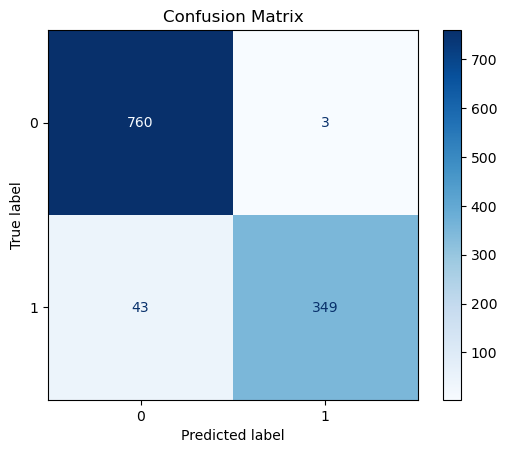

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## ROC Curve and AUC Score

Evaluate the model's ability to distinguish between classes.

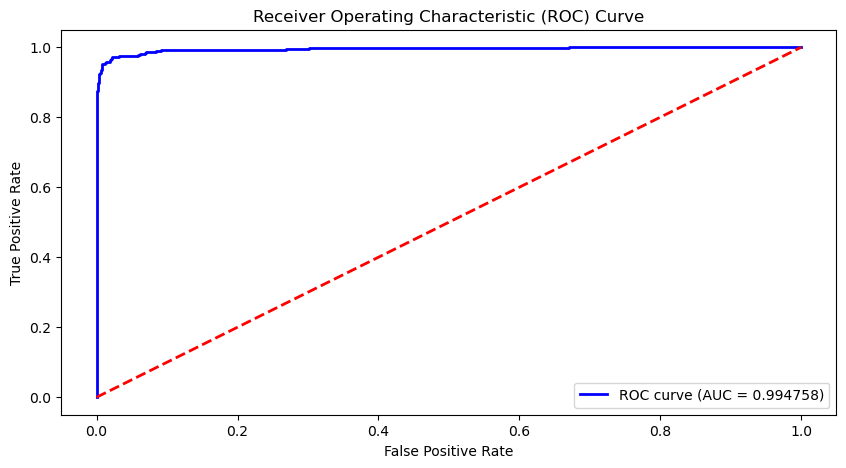

In [112]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute the ROC curve and AUC score
y_proba = svm_classifier.decision_function(X_test_vec)
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.6f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve and AUC score of 0.99 suggest that the SVM classifier is extremely effective at distinguishing between phishing and non-phishing emails. The model exhibits high true positive rates and low false positive rates, making it highly reliable in predicting phishing emails with minimal errors.

# Model Optimization and Validation

Apply techniques to optimize ML models to handle imbalanced data, which is common in phishing detection. Use validation strategies, including cross-validation and employing a hold-out test set specifically designed to evaluate email classification.

## Validate with Cross-Validation

including cross-validation and employing a hold-out test set specifically designed to evaluate email classification.



In [45]:
# Combine all data for cross-validation
X = pd.concat([X_train, X_test, X_val])
y = pd.concat([y_train, y_test, y_val])

In [46]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

X_vec = vectorizer.fit_transform(X)

# Set up k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X_vec, y, cv=kfold, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

Cross-validation scores: [0.95191683 0.95061728 0.94801819 0.95123537 0.96163849]
Mean accuracy: 0.952685233770261
Standard deviation: 0.004667141605605531


### Verify that the model is not overfitting

In [47]:
# Calculate training accuracy
y_train_pred = svm_classifier.predict(X_train_vec)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate test accuracy
y_test_pred = svm_classifier.predict(X_test_vec)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9849526286457366
Test Accuracy: 0.9601731601731601


Learning Curves:

Learning curves plot the training and validation scores as a function of the number of training examples.
Overfitting is indicated if the training score is significantly higher than the validation score and the validation score plateaus or decreases with more training data.

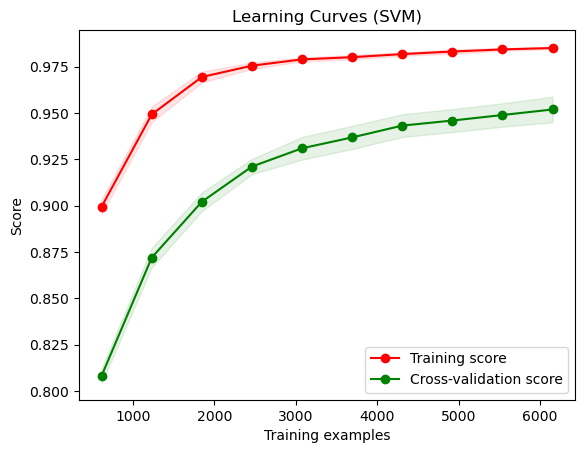

In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    svm_classifier, X_vec, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test scores
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (SVM)")
plt.xlabel("Training examples")
plt.ylabel("Score")

# Plot training scores
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")

# Plot cross-validation scores
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.legend(loc="best")
plt.show()


### The learning curves generated with 𝐶 = 0.5

#### Interpretation of Learning Curves

Training Score (Red Line):
* The training score remains high but slightly less than 1.0, indicating that the model is fitting the training data very well but with a bit of regularization to avoid overfitting.

Cross-Validation Score (Green Line): 

* The cross-validation score has increased and is closer to the training score compared to before, indicating improved generalization.

* The gap between the training and cross-validation scores has decreased, suggesting reduced overfitting.


#### Key Takeaways

Reduced Overfitting:
* The reduced gap between the training and cross-validation scores indicates that the model is now less overfitted compared to previous settings.
* The cross-validation score is higher and more consistent, showing better performance on unseen data.

Consistent Performance:

* Both training and cross-validation scores are high, indicating that the model is performing well on both the training and validation sets.
* The cross-validation score's stability suggests that the model generalizes well to new data.

### Learning curve without penalization:

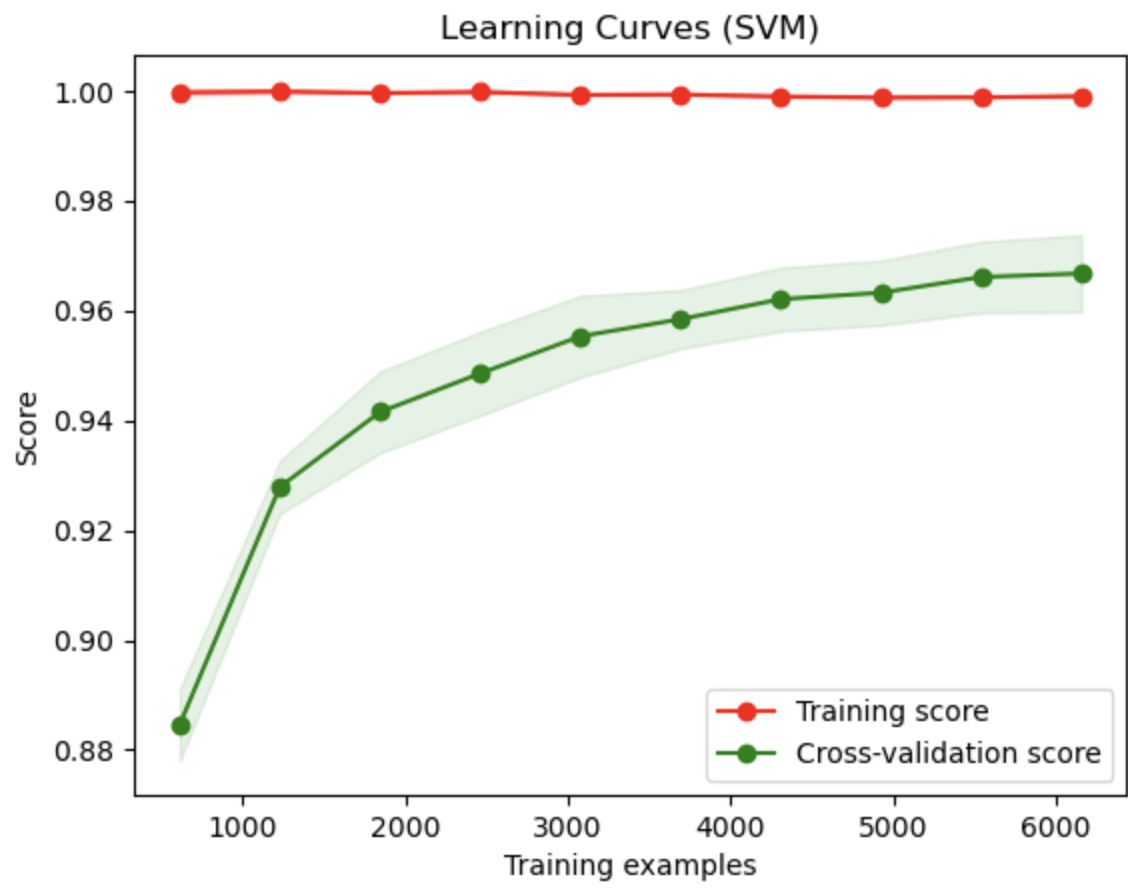

## Word2vec

In [119]:
import gensim
from gensim.models import Word2Vec

Preprocess and Train Word2Vec Model:

In [120]:
# Tokenize the text data
X_combined = pd.concat([X_train, X_test, X_val]).apply(gensim.utils.simple_preprocess)

# Train Word2Vec model
w2v_model = Word2Vec(sentences=X_combined, vector_size=100, window=5, min_count=1, workers=4)

# Function to convert text to Word2Vec vectors
def text_to_w2v(text, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in text:
        if word in model.wv.key_to_index:
            vector += model.wv[word]
            count += 1
    if count > 0:
        vector /= count
    return vector


Convert Text Data to Word2Vec Vectors:

In [121]:
# Apply the text_to_w2v function to the datasets
X_train_2vec = np.array([text_to_w2v(text, w2v_model) for text in X_train.apply(gensim.utils.simple_preprocess)])
X_test_2vec = np.array([text_to_w2v(text, w2v_model) for text in X_test.apply(gensim.utils.simple_preprocess)])
X_val_2vec = np.array([text_to_w2v(text, w2v_model) for text in X_val.apply(gensim.utils.simple_preprocess)])


In [122]:
# Initialize the SVM classifier
svm_classifier2 = SVC(C=1)

# Train the SVM classifier on the training data
svm_classifier2.fit(X_train_2vec, y_train)

# Make predictions on the test data
y_pred2 = svm_classifier2.predict(X_test_2vec)

# Evaluate the model on the test data
accuracy2vec = accuracy_score(y_test, y_pred2)
conf_matrix2vec = confusion_matrix(y_test, y_pred2)
class_report2vec = classification_report(y_test, y_pred2)

print("Test Data Evaluation (Word2Vec):")
print("Accuracy:", accuracy2vec)
print("Confusion Matrix:\n", conf_matrix2vec)
print("Classification Report:\n", class_report2vec)


Test Data Evaluation (Word2Vec):
Accuracy: 0.9575757575757575
Confusion Matrix:
 [[741  22]
 [ 27 365]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97       763
           1       0.94      0.93      0.94       392

    accuracy                           0.96      1155
   macro avg       0.95      0.95      0.95      1155
weighted avg       0.96      0.96      0.96      1155



In [123]:
# Extract TP, FP, FN, TN from confusion matrix
tn2, fp2, fn2, tp2 = conf_matrix2vec.ravel()

# Calculate TPR (Sensitivity or Recall) and FPR
tpr_value2 = tp2 / (tp2 + fn2) if (tp2 + fn2) != 0 else 0
fpr_value2 = fp2 / (fp2 + tn2) if (fp2 + tn2) != 0 else 0

# Calculate F1-score
f1_value2 = f1_score(y_test, y_pred2)

print("Word2Vec Model Evaluation:")
print(f"True Positive Rate (TPR): {tpr_value2:.6f}")
print(f"False Positive Rate (FPR): {fpr_value2:.6f}")
print(f"F1-Score: {f1_value2:.6f}")

Word2Vec Model Evaluation:
True Positive Rate (TPR): 0.931122
False Positive Rate (FPR): 0.028834
F1-Score: 0.937099


In [124]:
# Compute the ROC curve and AUC score
y_proba2 = svm_classifier2.decision_function(X_test_2vec)
roc_auc2 = roc_auc_score(y_test, y_proba2)

print("Word2Vec Model Evaluation:")
print(f"True Positive Rate (TPR): {tpr_value2:.6f}")
print(f"False Positive Rate (FPR): {fpr_value2:.6f}")
print(f"F1-Score: {f1_value2:.6f}")
print(f"ROC AUC: {roc_auc2:.6f}")


Word2Vec Model Evaluation:
True Positive Rate (TPR): 0.931122
False Positive Rate (FPR): 0.028834
F1-Score: 0.937099
ROC AUC: 0.990842


### Bag of Words

In [85]:
# Vectorize the text data using Bag of Words
vectorizer_bow = CountVectorizer()
X_train_3 = vectorizer_bow.fit_transform(X_train)
X_test_3 = vectorizer_bow.transform(X_test)
X_val_3 = vectorizer_bow.transform(X_val)

# Initialize the SVM classifier
svm_classifier3 = SVC(C=0.5)

# Train the SVM classifier on the training data
svm_classifier3.fit(X_train_3, y_train)

# Make predictions on the test data
y_pred3 = svm_classifier3.predict(X_test_3)


In [86]:
# Evaluate the model on the test data
accuracy3 = accuracy_score(y_test, y_pred3)
conf_matrix3 = confusion_matrix(y_test, y_pred3)
class_report3 = classification_report(y_test, y_pred3)

print("Test Data Evaluation (Bag of Words):")
print("Accuracy:", accuracy3)
print("Confusion Matrix:\n", conf_matrix3)
print("Classification Report:\n", class_report3)

Test Data Evaluation (Bag of Words):
Accuracy: 0.8900432900432901
Confusion Matrix:
 [[758   5]
 [122 270]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       763
           1       0.98      0.69      0.81       392

    accuracy                           0.89      1155
   macro avg       0.92      0.84      0.87      1155
weighted avg       0.90      0.89      0.88      1155



In [87]:
# Compute the ROC curve and AUC score
y_proba3 = svm_classifier3.decision_function(X_test_3)
fpr3, tpr3, _ = roc_curve(y_test, y_proba3)
roc_auc3 = roc_auc_score(y_test, y_proba3)

# Calculate F1-score
f1_value3 = f1_score(y_test, y_pred3)

# Extract TP, FP, FN, TN from confusion matrix
tn3, fp3, fn3, tp3 = conf_matrix3.ravel()

# Calculate TPR (Sensitivity or Recall) and FPR
tpr_value3 = tp3 / (tp3 + fn3) if (tp3 + fn3) != 0 else 0
fpr_value3 = fp3 / (fp3 + tn3) if (fp3 + tn3) != 0 else 0

print("Bag of Words Model Evaluation:")
print(f"ROC AUC: {roc_auc3:.6f}")
print(f"True Positive Rate (TPR): {tpr_value3:.6f}")
print(f"False Positive Rate (FPR): {fpr_value3:.6f}")
print(f"F1-Score: {f1_value3:.6f}")

Bag of Words Model Evaluation:
ROC AUC: 0.981885
True Positive Rate (TPR): 0.688776
False Positive Rate (FPR): 0.006553
F1-Score: 0.809595


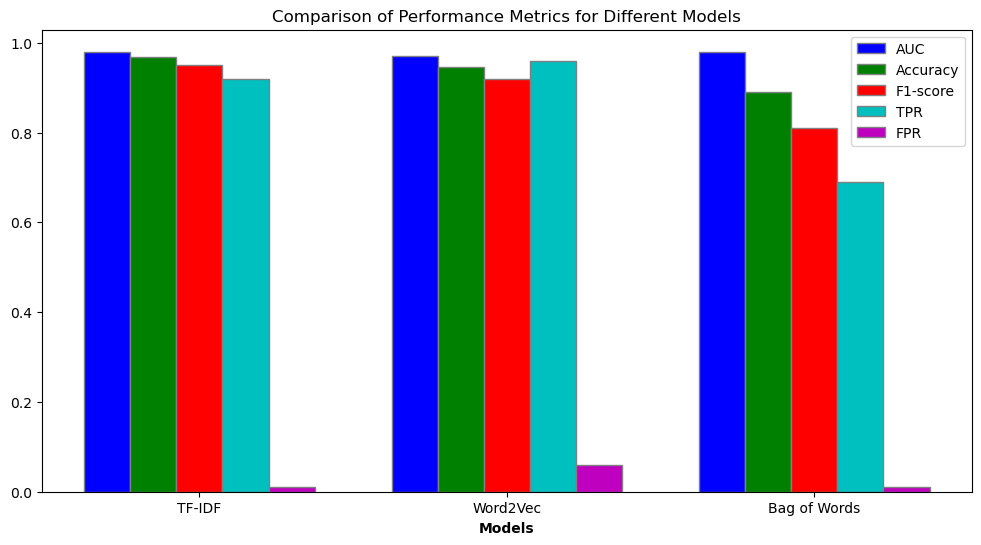

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ['TF-IDF', 'Word2Vec', 'Bag of Words']
auc_scores = [0.98, 0.97, 0.98]
accuracy_scores = [0.968, 0.946, 0.890]
f1_scores = [0.95, 0.92, 0.81]
tpr_scores = [0.92, 0.96, 0.69]
fpr_scores = [0.01, 0.06, 0.01]

# Bar width
bar_width = 0.15

# Set positions of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

# Create bars
plt.figure(figsize=(12, 6))
plt.bar(r1, auc_scores, color='b', width=bar_width, edgecolor='grey', label='AUC')
plt.bar(r2, accuracy_scores, color='g', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r3, f1_scores, color='r', width=bar_width, edgecolor='grey', label='F1-score')
plt.bar(r4, tpr_scores, color='c', width=bar_width, edgecolor='grey', label='TPR')
plt.bar(r5, fpr_scores, color='m', width=bar_width, edgecolor='grey', label='FPR')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + 2 * bar_width for r in range(len(models))], models)

# Create legend
plt.legend()

# Show the plot
plt.title('Comparison of Performance Metrics for Different Models')
plt.show()
